# Feather Engineering & Prediction

In [1]:
# Dependence
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')     # ignore the version warning

## Part 1:  Data Preparetion

In [2]:
# Step 1: Load the Data

# Load the dataset
data_url = "./source/austinHousingData.csv"
feather_data = pd.read_csv(data_url, encoding='utf-8')

# View basic information of the data
# feather_data.info()
# feather_data.describe()
feather_data.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


In [3]:
# Step 2: Data Cleaning
# Check missing values
missing_data= feather_data.isnull().sum()
print(missing_data[missing_data > 0])     # The description has little impact on the analysis results, so it will not be deleted.

description    2
dtype: int64


In [4]:
# Convert data types if necessary
feather_data['zipcode'] = feather_data['zipcode'].astype(str)
print(feather_data.dtypes)

zpid                            int64
city                           object
streetAddress                  object
zipcode                        object
description                    object
latitude                      float64
longitude                     float64
propertyTaxRate               float64
garageSpaces                    int64
hasAssociation                   bool
hasCooling                       bool
hasGarage                        bool
hasHeating                       bool
hasSpa                           bool
hasView                          bool
homeType                       object
parkingSpaces                   int64
yearBuilt                       int64
latestPrice                   float64
numPriceChanges                 int64
latest_saledate                object
latest_salemonth                int64
latest_saleyear                 int64
latestPriceSource              object
numOfPhotos                     int64
numOfAccessibilityFeatures      int64
numOfApplian

In [5]:
# Delete unnecessary columns
feather_data.drop(columns=['zpid', 'streetAddress', 'description', 'latest_saledate', 'latestPriceSource', 'homeImage'], inplace=True)
feather_data.dtypes

city                           object
zipcode                        object
latitude                      float64
longitude                     float64
propertyTaxRate               float64
garageSpaces                    int64
hasAssociation                   bool
hasCooling                       bool
hasGarage                        bool
hasHeating                       bool
hasSpa                           bool
hasView                          bool
homeType                       object
parkingSpaces                   int64
yearBuilt                       int64
latestPrice                   float64
numPriceChanges                 int64
latest_salemonth                int64
latest_saleyear                 int64
numOfPhotos                     int64
numOfAccessibilityFeatures      int64
numOfAppliances                 int64
numOfParkingFeatures            int64
numOfPatioAndPorchFeatures      int64
numOfSecurityFeatures           int64
numOfWaterfrontFeatures         int64
numOfWindowF

In [6]:
# Step 3: Features related to processing time
# Example of creating new features

# create new column: house_age
feather_data['house_age'] = feather_data['latest_saleyear'] - feather_data['yearBuilt']

# Delete 'latest_saleyear', 'yearBuilt'
feather_data.drop(columns=['latest_saleyear', 'yearBuilt'], inplace=True)

feather_data.info

<bound method DataFrame.info of                city zipcode   latitude  longitude  propertyTaxRate  \
0      pflugerville   78660  30.430632 -97.663078             1.98   
1      pflugerville   78660  30.432673 -97.661697             1.98   
2      pflugerville   78660  30.409748 -97.639771             1.98   
3      pflugerville   78660  30.432112 -97.661659             1.98   
4      pflugerville   78660  30.437368 -97.656860             1.98   
...             ...     ...        ...        ...              ...   
15166        austin   78748  30.161997 -97.816345             1.98   
15167        austin   78741  30.240223 -97.772835             1.98   
15168        austin   78704  30.244835 -97.761124             1.98   
15169        austin   78722  30.281569 -97.717789             1.98   
15170        austin   78702  30.276930 -97.701523             1.98   

       garageSpaces  hasAssociation  hasCooling  hasGarage  hasHeating  ...  \
0                 2            True        True 

In [7]:
# Code Category Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#  Code Category Variable
le = LabelEncoder()
feather_data['homeType'] = le.fit_transform(feather_data['homeType'])

# Perform OneHot Encoding on city and zipcode
feather_data = pd.get_dummies(feather_data, columns=['city', 'zipcode'])

# Summary statistics
# feather_data.describe()
feather_data.columns

Index(['latitude', 'longitude', 'propertyTaxRate', 'garageSpaces',
       'hasAssociation', 'hasCooling', 'hasGarage', 'hasHeating', 'hasSpa',
       'hasView', 'homeType', 'parkingSpaces', 'latestPrice',
       'numPriceChanges', 'latest_salemonth', 'numOfPhotos',
       'numOfAccessibilityFeatures', 'numOfAppliances', 'numOfParkingFeatures',
       'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures',
       'numOfWaterfrontFeatures', 'numOfWindowFeatures',
       'numOfCommunityFeatures', 'lotSizeSqFt', 'livingAreaSqFt',
       'numOfPrimarySchools', 'numOfElementarySchools', 'numOfMiddleSchools',
       'numOfHighSchools', 'avgSchoolDistance', 'avgSchoolRating',
       'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBathrooms',
       'numOfBedrooms', 'numOfStories', 'house_age', 'city_austin',
       'city_del valle', 'city_driftwood', 'city_dripping springs',
       'city_manchaca', 'city_manor', 'city_pflugerville', 'city_road',
       'city_west lake hills', 'zipcode_78617'

In [8]:
# Create price per square foot feature
feather_data['price_per_sqft'] = feather_data['latestPrice'] / feather_data['livingAreaSqFt']

In [9]:
# Standardized numerical features
from sklearn.preprocessing import StandardScaler

# Select numerical features
numerical_features = ['propertyTaxRate', 'garageSpaces', 'parkingSpaces', 'numPriceChanges', 'numOfPhotos','lotSizeSqFt', 'livingAreaSqFt', 'avgSchoolDistance', 'avgSchoolRating', 'avgSchoolSize', 'MedianStudentsPerTeacher',  'numOfBathrooms', 'numOfBedrooms', 'numOfStories', 'house_age', 'price_per_sqft']

# Standardized numerical features
scaler = StandardScaler()
feather_data[numerical_features] = scaler.fit_transform(feather_data[numerical_features])


In [10]:
# Separate features and target variable
X = feather_data.drop(columns=['latestPrice'])
y = feather_data['latestPrice']

# Data Preview
print(X.head())
print(y.head())

    latitude  longitude  propertyTaxRate  garageSpaces  hasAssociation  \
0  30.430632 -97.663078        -0.265248      0.570097            True   
1  30.432673 -97.661697        -0.265248      0.570097            True   
2  30.409748 -97.639771        -0.265248     -0.909113            True   
3  30.432112 -97.661659        -0.265248      0.570097            True   
4  30.437368 -97.656860        -0.265248     -0.909113            True   

   hasCooling  hasGarage  hasHeating  hasSpa  hasView  ...  zipcode_78750  \
0        True       True        True   False    False  ...          False   
1        True       True        True   False    False  ...          False   
2        True      False        True   False    False  ...          False   
3        True       True        True   False    False  ...          False   
4        True      False        True   False    False  ...          False   

   zipcode_78751  zipcode_78752  zipcode_78753  zipcode_78754  zipcode_78756  \
0          F

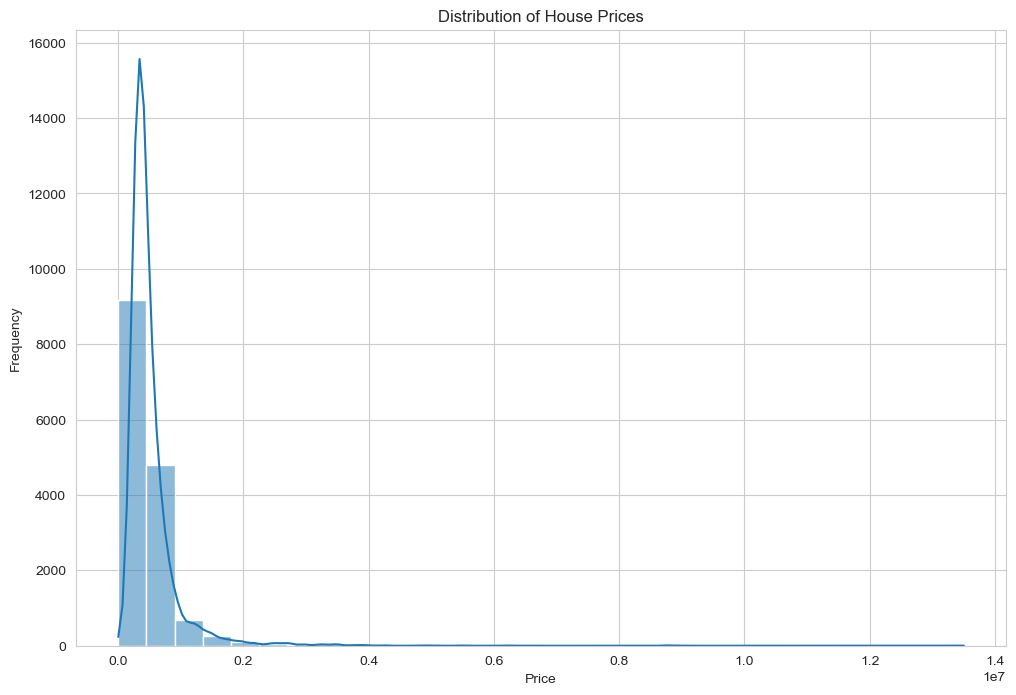

In [17]:
# Step 4: Data Exploration
sns.set_style("whitegrid")

# Distribution of house prices
plt.figure(figsize=(12, 8))
sns.histplot(feather_data['latestPrice'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

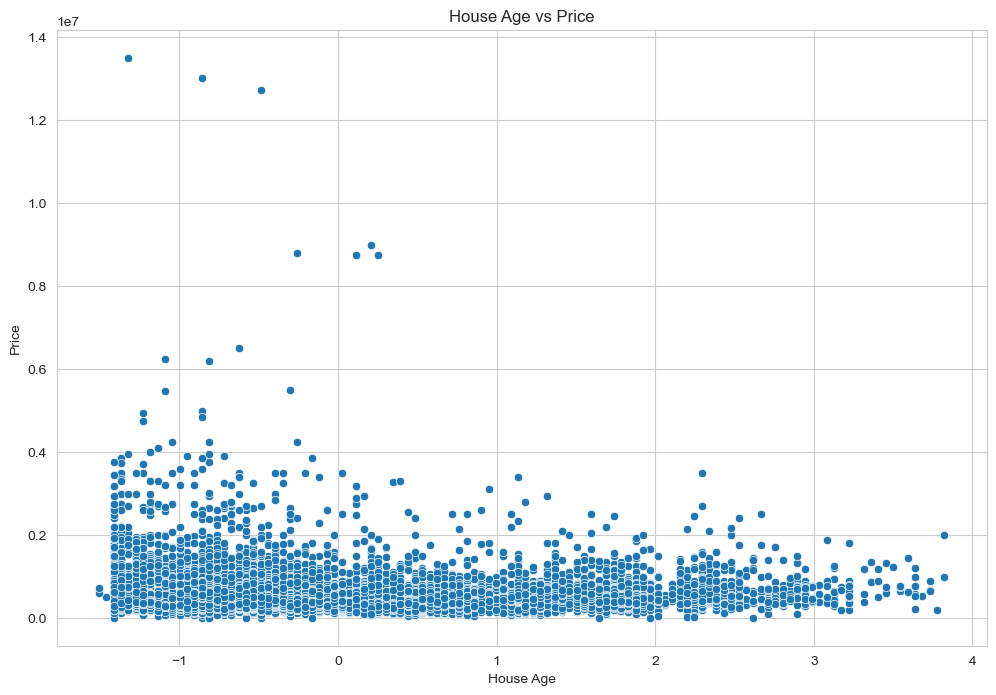

In [12]:
# Relationship between house age and price
plt.figure(figsize=(12, 8))
sns.scatterplot(data=feather_data, x='house_age', y='latestPrice')
plt.title('House Age vs Price')
plt.xlabel('House Age')
plt.ylabel('Price')
plt.show()

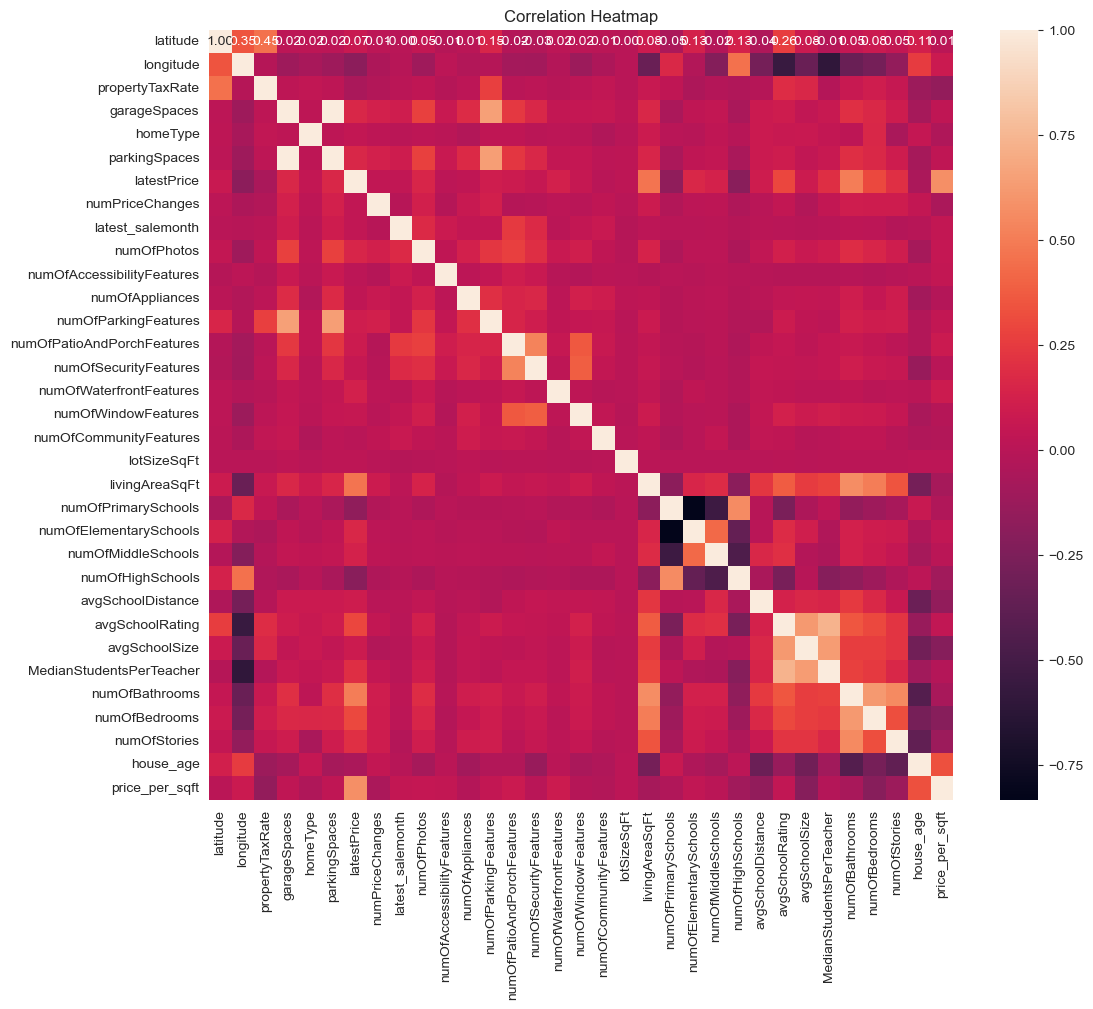

In [13]:
# Select numeric columns
numeric_data = feather_data.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Part 2: Linear Regression Model Prediction

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 分割训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建和训练线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 60239246950.166824
R² Score: 0.7454761767491598


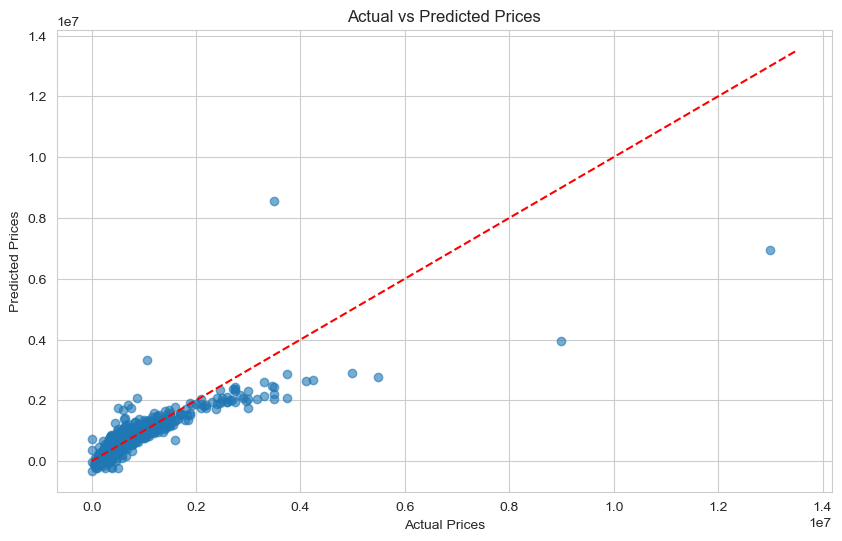

In [18]:
# 绘制实际值和预测值的对比图
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

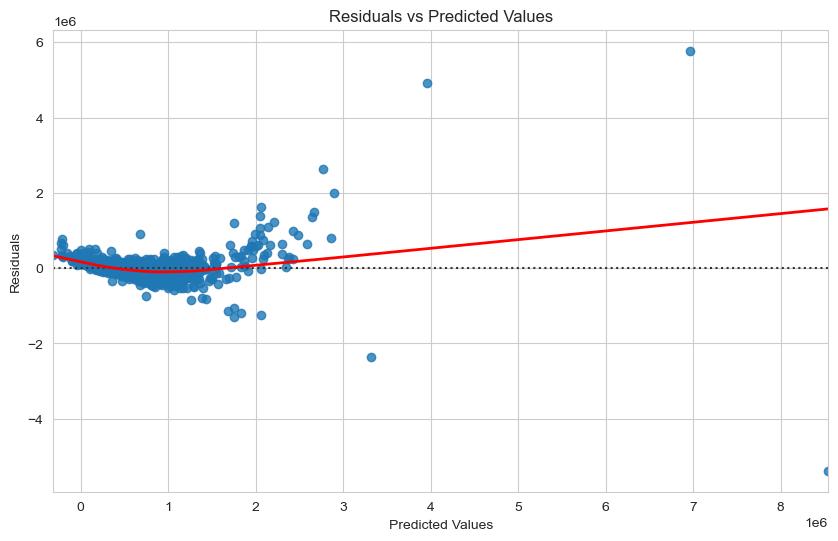

In [19]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

## RandomForest Model

Mean Squared Error (Random Forest): 36897169703.71563
R² Score (Random Forest): 0.8441014923726771


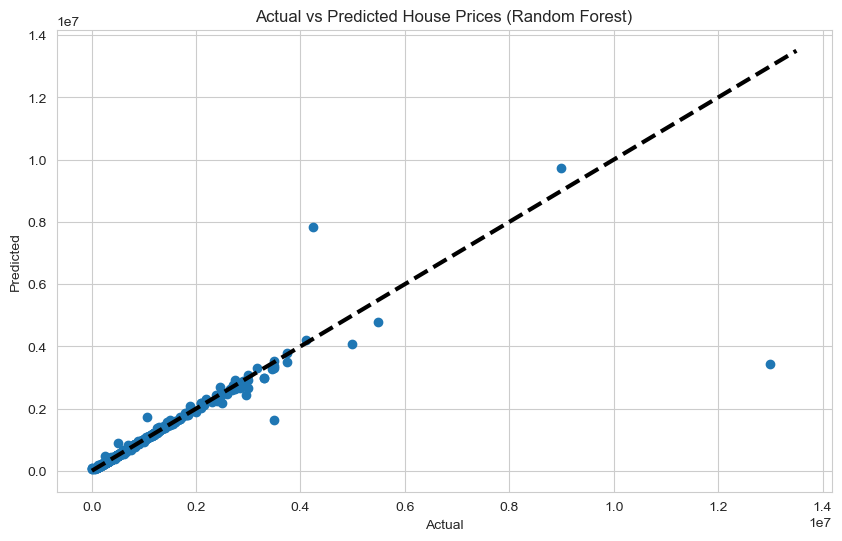

In [20]:
from sklearn.ensemble import RandomForestRegressor

# Create RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'R² Score (Random Forest): {r2_rf}')

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted House Prices (Random Forest)')
plt.show()

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  17.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  18.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  35.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  38.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  19.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=  20.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  40.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; tota

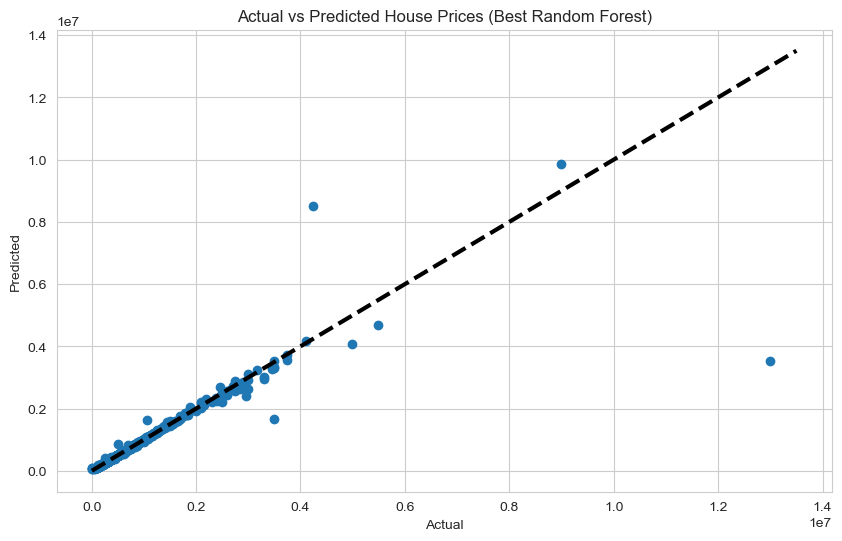

In [21]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to be tuned
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3,  # 3 折交叉验证
                           n_jobs=-1,  # 使用所有可用的 CPU 资源
                           verbose=2,  # 输出详细信息
                           scoring='r2')  # 使用 R² 作为评估指标

# Conduct hyperparameter tuning
grid_search.fit(X_train, y_train)

# Output the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Predict using the best parameters
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the optimized model
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f'Mean Squared Error (Best Random Forest): {mse_best_rf}')
print(f'R² Score (Best Random Forest): {r2_best_rf}')

# Plot a comparison chart of actual values and predicted values.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_rf)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted House Prices (Best Random Forest)')
plt.show()
